In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add it to sys.path
sys.path.append(project_root)

In [2]:
from bimpcc.dataset import get_dataset
from bimpcc.models.tvdenoising_model import TVDenoisingMPCC
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

In [3]:
def plot_experiment(true,noisy,u, alpha):
    
    fig,ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].imshow(true,cmap='gray')
    ax[0].set_title('True Image')
    ax[0].axis('off')
    ax[1].imshow(noisy,cmap='gray')
    ax[1].set_title('Noisy Image\nPSNR: {:.4f}'.format(psnr(true,noisy)))
    ax[1].axis('off')
    ax[2].imshow(u,cmap='gray')
    ax[2].set_title(f'Reconstructed Image\nPSNR: {psnr(true,u):.4f}\n alpha = {alpha}')
    # ax[2].set_xlabel('alpha = {}'.format(alpha))
    ax[2].axis('off')

    plt.show()

In [24]:
scale = 64

In [25]:
dataset = get_dataset("cameraman",scale=scale)
true, noisy = dataset.get_training_data()

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

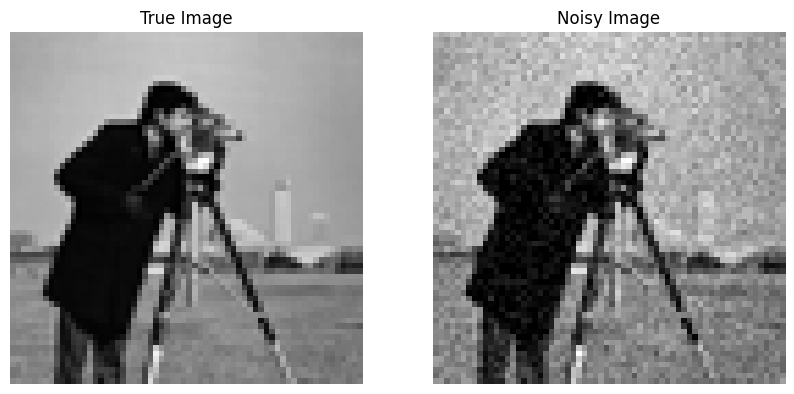

In [26]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(true,cmap='gray')
ax[0].set_title('True Image')
ax[0].axis('off')
ax[1].imshow(noisy,cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

In [27]:
model = TVDenoisingMPCC(true,noisy,epsilon=1e-3,t_init=1.0)

In [28]:
res,x_opt,fun_opt = model.solve(max_iter=20,t_min=1e-9,tol=1e-2,print_level=0,verbose=True, nlp_max_iter=5000, nlp_tol=1e-6)

Iter   Termination_status            Objective      MPCC_compl               t

0                -1  0.7294180151505975      8.936728889982252                  1.0

1                -1  0.596847363731898       8.912018864054             1.1

2                -1  0.5557837929982162      8.967750653056301       1.2100000000000002

3                -1  0.5705694924626228      8.944934213233811       1.3310000000000004

4                -1  0.49436788728263875     8.951908834927638       1.4641000000000006

5                -1  0.6101620895109717      8.936438499679282       1.6105100000000008

6                -1  0.619966131536726       8.924608697641379       1.771561000000001

KeyboardInterrupt: 

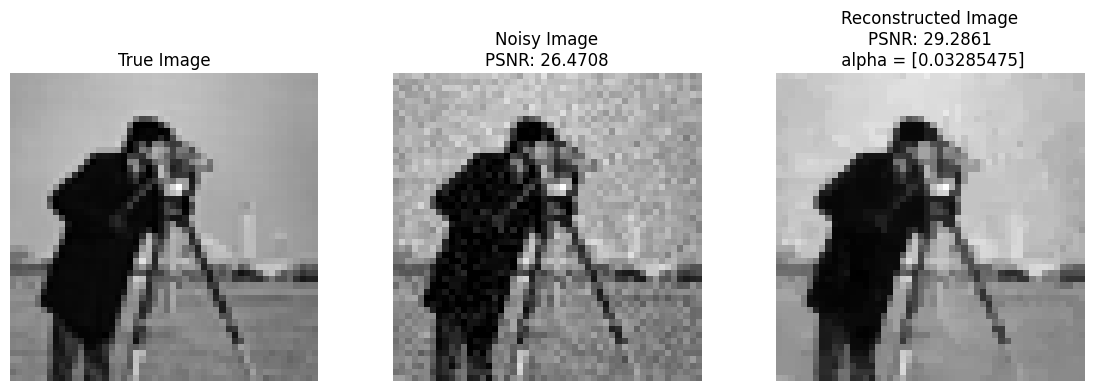

In [23]:
u, q, r, delta, theta, alpha = model.parse_vars_fn(x_opt)
u = u.reshape((scale,scale))
plot_experiment(true,noisy,u,alpha)